# Problem statement
Sub-task 1: Think through what key drivers of churn could be for our client

Sub-task 2: Build the features in order to get ready to model

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
# Set plot style
%matplotlib inline
sns.set(color_codes=True)
    

In [7]:
# Set maximum number of columns to be displayed
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)


In [8]:
#importing previous data
data = pd.read_csv('eda.csv')

In [1]:
data.head()

NameError: name 'data' is not defined

In [ ]:
data.info()

In [ ]:
data.columns

In [ ]:
#converting date object to date time
data[['date_activ', 'date_end',
       'date_modif_prod', 'date_renewal']] = data[['date_activ', 'date_end',
       'date_modif_prod', 'date_renewal' ]].apply(pd.to_datetime)

In [ ]:
data.info()

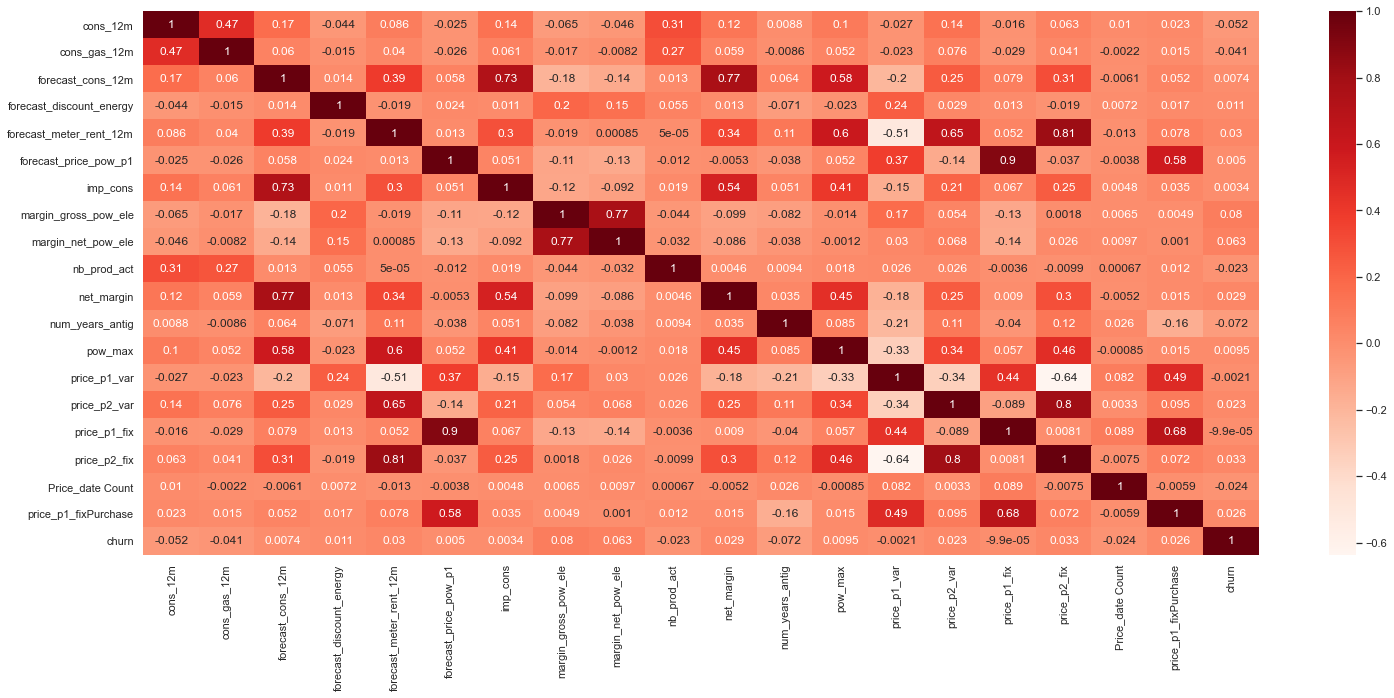

In [9]:
plt.figure(figsize=(25,10))

sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
data.corr()

,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p1_fix,price_p2_fix,Price_date Count,price_p1_fixPurchase,churn
cons_12m,1.000000,0.471233,0.165168,-0.043618,0.085996,-0.025267,0.139353,-0.065304,-0.045595,0.308567,0.119358,0.008810,0.102435,-0.026999,0.142521,-0.016236,0.063055,0.010165,0.022804,-0.051759
cons_gas_12m,0.471233,1.000000,0.059525,-0.014893,0.040327,-0.025831,0.060609,-0.016866,-0.008242,0.272005,0.058934,-0.008626,0.052375,-0.023450,0.075811,-0.028854,0.040604,-0.002193,0.015305,-0.040880
forecast_cons_12m,0.165168,0.059525,1.000000,0.014457,0.390550,0.057758,0.725550,-0.184134,-0.141600,0.013283,0.768531,0.064431,0.583081,-0.202105,0.247106,0.079481,0.306208,-0.006118,0.051624,0.007395
forecast_discount_energy,-0.043618,-0.014893,0.014457,1.000000,-0.019232,0.024247,0.010977,0.198206,0.150205,0.055279,0.013174,-0.071132,-0.022651,0.238557,0.029475,0.013476,-0.018623,0.007189,0.016653,0.010833
forecast_meter_rent_12m,0.085996,0.040327,0.390550,-0.019232,1.000000,0.013424,0.296259,-0.018959,0.000854,0.000050,0.335927,0.112271,0.600571,-0.511452,0.651768,0.052173,0.814997,-0.013478,0.078483,0.029971
forecast_price_pow_p1,-0.025267,-0.025831,0.057758,0.024247,0.013424,1.000000,0.051353,-0.114011,-0.133460,-0.011529,-0.005348,-0.038003,0.051764,0.374694,-0.142494,0.900560,-0.036998,-0.003809,0.576500,0.005024
imp_cons,0.139353,0.060609,0.725550,0.010977,0.296259,0.051353,1.000000,-0.122116,-0.092258,0.019056,0.536559,0.051019,0.407674,-0.154433,0.210642,0.066767,0.245810,0.004763,0.034528,0.003417
margin_gross_pow_ele,-0.065304,-0.016866,-0.184134,0.198206,-0.018959,-0.114011,-0.122116,1.000000,0.766521,-0.043768,-0.098556,-0.081521,-0.013556,0.170308,0.053755,-0.126182,0.001778,0.006474,0.004901,0.080170
margin_net_pow_ele,-0.045595,-0.008242,-0.141600,0.150205,0.000854,-0.133460,-0.092258,0.766521,1.000000,-0.032197,-0.086328,-0.037913,-0.001209,0.029692,0.067617,-0.135190,0.026444,0.009745,0.001038,0.063189
nb_prod_act,0.308567,0.272005,0.013283,0.055279,0.000050,-0.011529,0.019056,-0.043768,-0.032197,1.000000,0.004561,0.009384,0.018390,0.026478,0.025580,-0.003636,-0.009938,0.000673,0.012359,-0.022609


So from this, I is observed that some of the focarsted values are corrolated to one value to the other and in other to remove redundnacy in the data, I will have to drop them and also drop price_p3_fix and price_p3_var as they are highly corrolated to price_p2_
* Also, i will be dropping cons_last_month since it is reflected in cons_12m

In [11]:
data.columns

Index(['id', 'activity_new', 'channel_sales', 'cons_12m', 'cons_gas_12m',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'price_p1_var',
       'price_p2_var', 'price_p1_fix', 'price_p2_fix', 'Price_date Count',
       'price_p1_fixPurchase', 'churn'],
      dtype='object')

In [12]:
data.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_p1_var,price_p2_var,price_p1_fix,price_p2_fix,Price_date Count,price_p1_fixPurchase,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,0.0,359.29,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,1.241384,1.105379,707.478018,436.282646,12,1,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0.0,1.78,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.351412,1.123509,447.040256,268.224124,12,1,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0.0,16.27,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,1.649274,0.000000,487.469573,0.000000,12,1,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0.0,38.72,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,2.046140,1.061055,532.625404,0.000000,12,1,0
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0.0,19.83,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,1.814521,0.000000,532.803183,0.000000,12,1,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   channel_sales             11878 non-null  object 
 3   cons_12m                  16096 non-null  int64  
 4   cons_gas_12m              16096 non-null  int64  
 5   date_activ                16096 non-null  object 
 6   date_end                  16096 non-null  object 
 7   date_modif_prod           16096 non-null  object 
 8   date_renewal              16096 non-null  object 
 9   forecast_cons_12m         16096 non-null  float64
 10  forecast_discount_energy  16096 non-null  float64
 11  forecast_meter_rent_12m   16096 non-null  float64
 12  forecast_price_pow_p1     16096 non-null  float64
 13  has_gas                   16096 non-null  object 
 14  imp_co

In [14]:
data = data.drop(['forecast_price_pow_p1'], axis = 1)

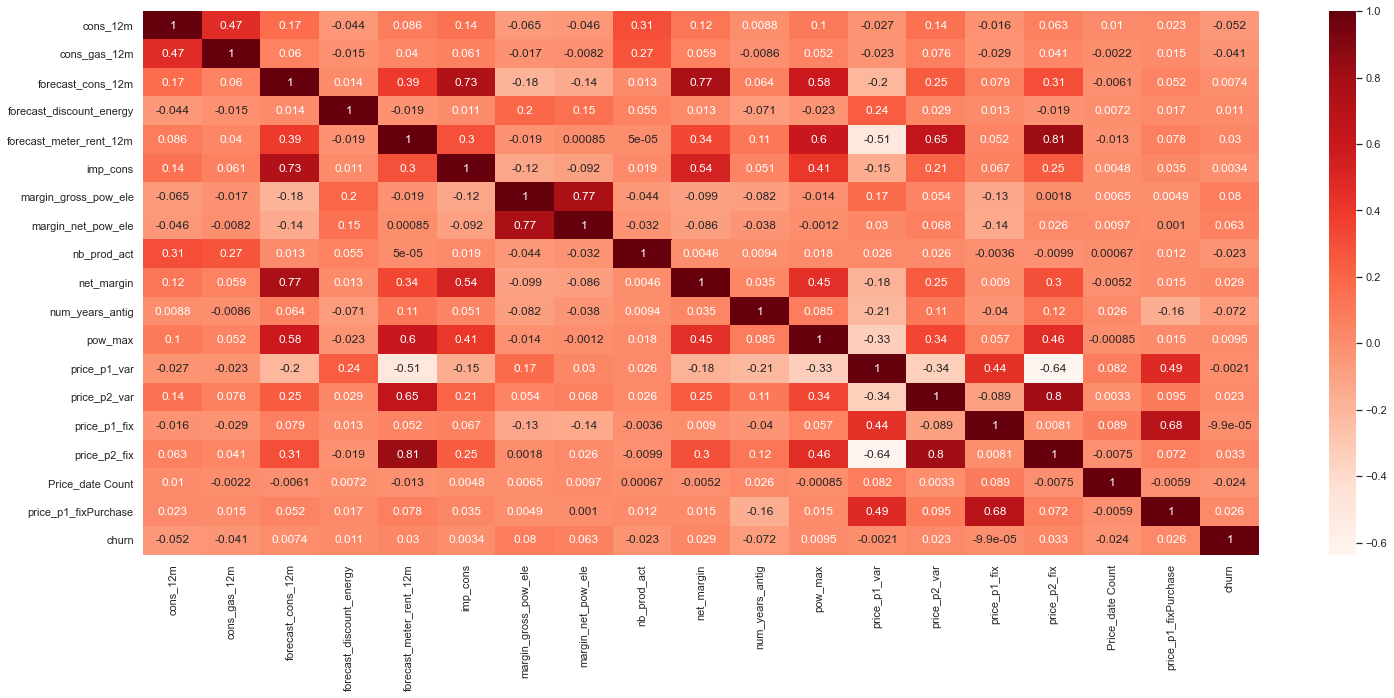

In [15]:
plt.figure(figsize=(25,10))

sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [16]:
data.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_p1_var,price_p2_var,price_p1_fix,price_p2_fix,Price_date Count,price_p1_fixPurchase,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,0.0,359.29,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,1.241384,1.105379,707.478018,436.282646,12,1,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0.0,1.78,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.351412,1.123509,447.040256,268.224124,12,1,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0.0,16.27,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,1.649274,0.000000,487.469573,0.000000,12,1,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0.0,38.72,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,2.046140,1.061055,532.625404,0.000000,12,1,0
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0.0,19.83,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,1.814521,0.000000,532.803183,0.000000,12,1,0


In [17]:
data.describe()

,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p1_fix,price_p2_fix,Price_date Count,price_p1_fixPurchase,churn
count,1.609600e+04,1.609600e+04,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,1.948044e+05,3.191164e+04,2370.555949,0.983785,70.309945,196.123447,22.461168,21.459922,1.347788,217.895415,5.030629,20.602873,1.678680,0.647838,515.844784,127.375453,11.990681,0.992483,0.099093
std,6.795151e+05,1.775885e+05,4035.085664,5.141470,79.023251,494.366979,23.691341,27.906076,1.459808,366.583368,1.676101,21.770587,0.293703,0.594612,65.795636,152.933547,0.137117,0.086379,0.298796
min,-1.252760e+05,-3.037000e+03,-16689.260000,0.000000,-242.960000,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000
25%,5.906250e+03,0.000000e+00,513.230000,0.000000,16.230000,0.000000,12.025000,11.950000,1.000000,52.017500,4.000000,12.500000,1.486491,0.000000,487.932042,0.000000,12.000000,1.000000,0.000000
50%,1.533250e+04,0.000000e+00,1179.160000,0.000000,19.440000,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,1.757582,1.024101,531.203166,0.000000,12.000000,1.000000,0.000000
75%,5.022150e+04,0.000000e+00,2692.077500,0.000000,131.470000,218.090000,29.640000,29.640000,1.000000,275.735000,6.000000,19.800000,1.800112,1.226935,532.447623,292.661462,12.000000,1.000000,0.000000
max,1.609711e+07,4.188440e+06,103801.930000,50.000000,2411.690000,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,3.345105,2.355302,713.336520,437.888298,12.000000,1.000000,1.000000


Handlign Negative Values and skewed data

In [18]:
#Log transformation that is to be used for handling skewed data does not work with negative data, so we will convert the negative values to NaN  and we cannot apply a log transformation to 0 valued entries, so we will add a constant 1.


In [19]:
negative_columns = ['cons_12m', 'cons_gas_12m', 'forecast_cons_12m', 'forecast_meter_rent_12m', 'imp_cons', 'margin_net_pow_ele', 'margin_net_pow_ele', 'net_margin', 'margin_gross_pow_ele']
for x in data[negative_columns]:
    data.loc[data[x] < 0, x] = 0
    data[x] = np.log10(data[x] + 1)
data.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_p1_var,price_p2_var,price_p1_fix,price_p2_fix,Price_date Count,price_p1_fixPurchase,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,5.490346,0.000000,2012-11-07,2016-11-06,2012-11-07,2015-11-09,4.423595,0.0,2.556652,f,2.920541,0.000000,0.000000,1,3.238889,3,ldkssxwpmemidmecebumciepifcamkci,180.000,1.241384,1.105379,707.478018,436.282646,12,1,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0.000000,4.739944,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.000000,0.0,0.444045,t,0.000000,1.422261,0.384221,2,2.832503,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.351412,1.123509,447.040256,268.224124,12,1,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,3.668479,0.000000,2009-08-21,2016-08-30,2009-08-21,2015-08-31,2.280920,0.0,1.237292,f,0.000000,1.240050,0.350258,1,1.298635,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,1.649274,0.000000,487.469573,0.000000,12,1,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,2.736397,0.000000,2010-04-16,2016-04-16,2010-04-16,2015-04-17,1.689841,0.0,1.599009,f,0.000000,1.471292,0.392924,1,0.880814,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,2.046140,1.061055,532.625404,0.000000,12,1,0
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,3.200029,0.000000,2010-03-30,2016-03-30,2010-03-30,2015-03-31,2.382089,0.0,1.318689,f,0.000000,1.494433,0.396972,1,1.422590,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,1.814521,0.000000,532.803183,0.000000,12,1,0


In [20]:
data.describe()

,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p1_fix,price_p2_fix,Price_date Count,price_p1_fixPurchase,churn
count,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,4.276626,0.800002,2.999167,0.983785,1.549224,1.302832,1.206924,0.329235,1.347788,2.035808,5.030629,20.602873,1.678680,0.647838,515.844784,127.375453,11.990681,0.992483,0.099093
std,0.931149,1.748575,0.724895,5.141470,0.589827,1.165778,0.473266,0.119319,1.459808,0.594744,1.676101,21.770587,0.293703,0.594612,65.795636,152.933547,0.137117,0.086379,0.298796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000
25%,3.771385,0.000000,2.711157,0.000000,1.236285,0.000000,1.114778,0.324749,1.000000,1.724419,4.000000,12.500000,1.486491,0.000000,487.932042,0.000000,12.000000,1.000000,0.000000
50%,4.185641,0.000000,3.071941,0.000000,1.310481,1.657677,1.344196,0.369555,1.000000,2.081635,5.000000,13.856000,1.757582,1.024101,531.203166,0.000000,12.000000,1.000000,0.000000
75%,4.700898,0.000000,3.430249,0.000000,2.122118,2.340623,1.486289,0.395552,1.000000,2.442064,6.000000,19.800000,1.800112,1.226935,532.447623,292.661462,12.000000,1.000000,0.000000
max,7.206748,6.622052,5.016210,50.000000,3.382502,4.177357,2.574772,0.553248,32.000000,4.390434,16.000000,500.000000,3.345105,2.355302,713.336520,437.888298,12.000000,1.000000,1.000000


In [21]:
data.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_p1_var,price_p2_var,price_p1_fix,price_p2_fix,Price_date Count,price_p1_fixPurchase,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,5.490346,0.000000,2012-11-07,2016-11-06,2012-11-07,2015-11-09,4.423595,0.0,2.556652,f,2.920541,0.000000,0.000000,1,3.238889,3,ldkssxwpmemidmecebumciepifcamkci,180.000,1.241384,1.105379,707.478018,436.282646,12,1,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0.000000,4.739944,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.000000,0.0,0.444045,t,0.000000,1.422261,0.384221,2,2.832503,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.351412,1.123509,447.040256,268.224124,12,1,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,3.668479,0.000000,2009-08-21,2016-08-30,2009-08-21,2015-08-31,2.280920,0.0,1.237292,f,0.000000,1.240050,0.350258,1,1.298635,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,1.649274,0.000000,487.469573,0.000000,12,1,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,2.736397,0.000000,2010-04-16,2016-04-16,2010-04-16,2015-04-17,1.689841,0.0,1.599009,f,0.000000,1.471292,0.392924,1,0.880814,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,2.046140,1.061055,532.625404,0.000000,12,1,0
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,3.200029,0.000000,2010-03-30,2016-03-30,2010-03-30,2015-03-31,2.382089,0.0,1.318689,f,0.000000,1.494433,0.396972,1,1.422590,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,1.814521,0.000000,532.803183,0.000000,12,1,0


Handling Outliers

C:\Users\Abraham T Owos\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Abraham T Owos\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Abraham T Owos\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments

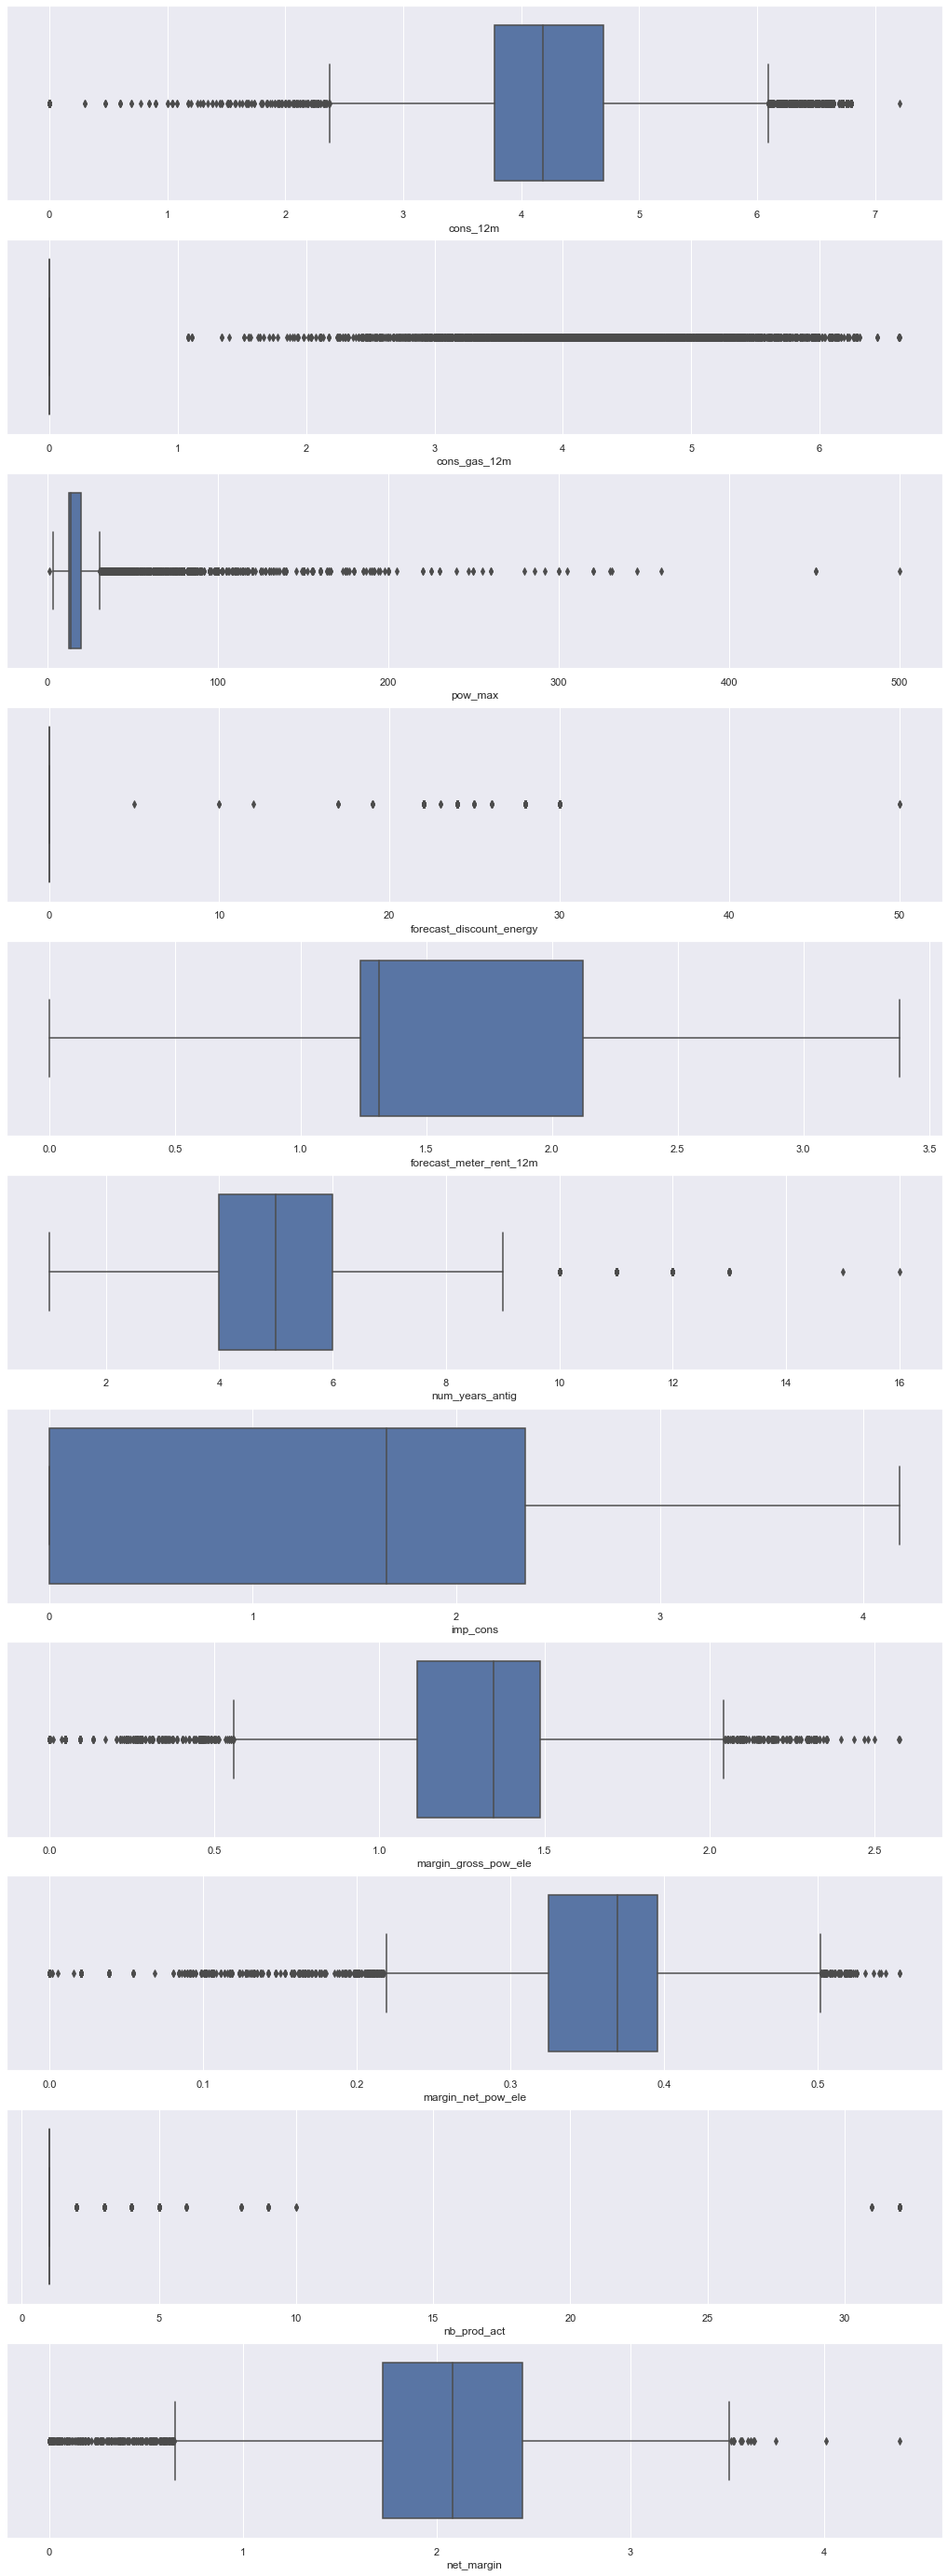

In [22]:
 fig, axs = plt.subplots(nrows=11, figsize=(18,50))
# Plot boxplots
sns.boxplot((data["cons_12m"]), ax=axs[0])
sns.boxplot((data["cons_gas_12m"]), ax=axs[1])
sns.boxplot((data["pow_max"]), ax=axs[2])
sns.boxplot((data["forecast_discount_energy"]), ax=axs[3])
sns.boxplot((data["forecast_meter_rent_12m"]), ax=axs[4])
sns.boxplot((data["num_years_antig"]), ax=axs[5])
sns.boxplot((data["imp_cons"]), ax=axs[6])
sns.boxplot((data["margin_gross_pow_ele"]), ax=axs[7])
sns.boxplot((data["margin_net_pow_ele"]), ax=axs[8])
sns.boxplot((data["nb_prod_act"]), ax=axs[9])
sns.boxplot((data["net_margin"]), ax=axs[10])



plt.show()

SO a lot of outliers

In [23]:
q = data
features=['cons_12m', ' cons_gas_12m', 'forecast_cons_12m', 'forecast_discount_energy', 'forecast_price_energy_p1', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max']


In [24]:
q.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_p1_var,price_p2_var,price_p1_fix,price_p2_fix,Price_date Count,price_p1_fixPurchase,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,5.490346,0.000000,2012-11-07,2016-11-06,2012-11-07,2015-11-09,4.423595,0.0,2.556652,f,2.920541,0.000000,0.000000,1,3.238889,3,ldkssxwpmemidmecebumciepifcamkci,180.000,1.241384,1.105379,707.478018,436.282646,12,1,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0.000000,4.739944,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.000000,0.0,0.444045,t,0.000000,1.422261,0.384221,2,2.832503,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.351412,1.123509,447.040256,268.224124,12,1,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,3.668479,0.000000,2009-08-21,2016-08-30,2009-08-21,2015-08-31,2.280920,0.0,1.237292,f,0.000000,1.240050,0.350258,1,1.298635,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,1.649274,0.000000,487.469573,0.000000,12,1,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,2.736397,0.000000,2010-04-16,2016-04-16,2010-04-16,2015-04-17,1.689841,0.0,1.599009,f,0.000000,1.471292,0.392924,1,0.880814,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,2.046140,1.061055,532.625404,0.000000,12,1,0
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,3.200029,0.000000,2010-03-30,2016-03-30,2010-03-30,2015-03-31,2.382089,0.0,1.318689,f,0.000000,1.494433,0.396972,1,1.422590,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,1.814521,0.000000,532.803183,0.000000,12,1,0


In [25]:
from scipy.stats import zscore
for x in q[['cons_12m', 'cons_gas_12m', 'forecast_cons_12m', 'forecast_discount_energy', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max']]:
    Z = 3
    q['zscore'] = zscore(q[x])
    mean_ = q[(q['zscore'] > -Z) & (q['zscore'] < Z)][x].mean()
    q = q.loc[q['zscore'].abs()<=3]
    q = q.drop('zscore', axis=1)
q.shape

(14121, 28)

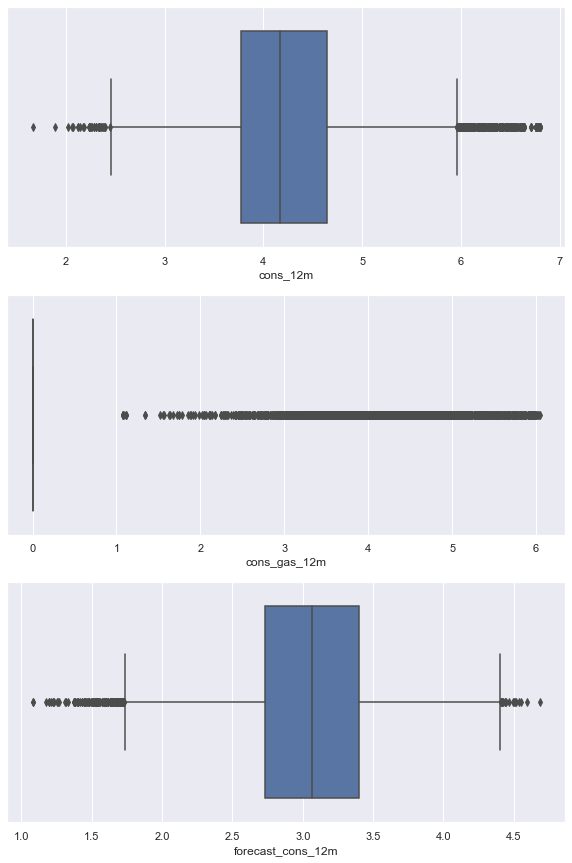

(14121, 28)

In [26]:
fig, axs = plt.subplots(nrows=3, figsize=(10,15))

sns.boxplot(data = q, x = q['cons_12m'], ax=axs[0])
sns.boxplot(data = q, x = q['cons_gas_12m'], ax=axs[1])
sns.boxplot(data = q, x = q['forecast_cons_12m'], ax=axs[2])
plt.show()
q.shape

In [27]:
data = q
data.describe()

,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p1_fix,price_p2_fix,Price_date Count,price_p1_fixPurchase,churn
count,14121.000000,14121.000000,14121.000000,14121.000000,14121.000000,14121.000000,14121.000000,14121.000000,14121.000000,14121.000000,14121.000000,14121.000000,14121.000000,14121.000000,14121.000000,14121.000000,14121.000000,14121.0,14121.000000
mean,4.289485,0.735442,3.060936,0.000354,1.536917,1.291610,1.212948,0.332625,1.257560,2.068514,4.855109,17.951337,1.690305,0.621641,518.755702,119.693208,11.990298,1.0,0.100135
std,0.783898,1.662641,0.491480,0.042076,0.560893,1.142247,0.435953,0.109758,0.584639,0.473735,1.315240,11.202389,0.241458,0.591673,44.664044,150.131322,0.137684,0.0,0.300190
min,1.662758,0.000000,1.080626,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.553883,1.000000,1.000000,0.826797,0.000000,282.264564,0.000000,7.000000,1.0,0.000000
25%,3.768416,0.000000,2.733245,0.000000,1.236033,0.000000,1.125806,0.327124,1.000000,1.746634,4.000000,12.500000,1.489203,0.000000,487.932042,0.000000,12.000000,1.0,0.000000
50%,4.163668,0.000000,3.067149,0.000000,1.304921,1.653502,1.333246,0.367885,1.000000,2.078348,5.000000,13.856000,1.761628,1.012375,531.203166,0.000000,12.000000,1.0,0.000000
75%,4.645668,0.000000,3.401545,0.000000,2.121100,2.309694,1.465383,0.391569,1.000000,2.415023,6.000000,19.720000,1.799442,1.226220,532.380945,292.563710,12.000000,1.0,0.000000
max,6.798393,6.044470,4.684449,5.000000,2.861038,4.177357,2.354339,0.525607,5.000000,3.433320,10.000000,80.000000,3.345105,2.355302,713.336520,437.888298,12.000000,1.0,1.000000


Handling Categorical values and gettign dummies


In [28]:
#converting has_gas to dummies
has_gas = pd.get_dummies(data['has_gas'])
has_gas.head()

,f,t
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0


In [29]:
#assigning has_gas to t
data.has_gas = has_gas.t

In [30]:
#fillig nup missing values 
data[['channel_sales', 'origin_up']]= data[['channel_sales', 'origin_up']].fillna("null_values_channel")


In [31]:
# Transform to categorical data type
data[['channel_sales', 'origin_up']] = data[['channel_sales', 'origin_up']].astype("category")


In [32]:
for x in data[['channel_sales', 'origin_up']].columns:
    print(x)
    print(data[x].value_counts())

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6676
null_values_channel                 3384
lmkebamcaaclubfxadlmueccxoimlema    1849
usilxuppasemubllopkaafesmlibmsdf    1310
ewpakwlliwisiwduibdlfmalxowmwpci     884
sddiedcslfslkckwlfkdpoeeailfpeds      12
epumfxlbckeskwekxbiuasklxalciiuu       4
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64
origin_up
lxidpiddsbxsbosboudacockeimpuepw    6940
kamkkxfxxuwbdslkwifmmcsiusiuosws    4205
ldkssxwpmemidmecebumciepifcamkci    2909
null_values_channel                   64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64


We now have 8 categories for channel_sales and 6 for origin up

In [33]:
channel_dummies = pd.get_dummies(data['channel_sales'], prefix = 'channels')
origin_dummies = pd.get_dummies(data['origin_up'], prefix = 'origin')

In [34]:
# Renaming columns to pick the first 11 characters as their name for simplicity
channel_dummies.columns  = [col_name[:11] for col_name in channel_dummies .columns]
origin_dummies.columns = [col_name[:11] for col_name in origin_dummies.columns]


In [35]:
origin_dummies.head()

,origin_ewxe,origin_kamk,origin_ldks,origin_lxid,origin_null,origin_usap
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
5,0,0,0,1,0,0
6,0,1,0,0,0,0


In [36]:
channel_dummies.head()

,channels_ep,channels_ew,channels_fi,channels_fo,channels_lm,channels_nu,channels_sd,channels_us
2,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0
5,0,0,0,1,0,0,0,0
6,0,0,0,0,0,1,0,0


In [37]:
#dropping the null channels to avoid redundancy as before, this will mean that every other colum that is not one then that client/record has a null channel_sales or origin
channel_dummies = channel_dummies.drop('channels_nu', axis=1)
origin_dummies = origin_dummies.drop('origin_null', axis=1)

In [38]:
##merging now, So that I won't forget later
data = pd.concat([data, channel_dummies, origin_dummies], axis =1)

In [39]:
data.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_p1_var,price_p2_var,price_p1_fix,price_p2_fix,Price_date Count,price_p1_fixPurchase,churn,channels_ep,channels_ew,channels_fi,channels_fo,channels_lm,channels_sd,channels_us,origin_ewxe,origin_kamk,origin_ldks,origin_lxid,origin_usap
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,null_values_channel,3.668479,0.0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,2.280920,0.0,1.237292,0,0.000000,1.240050,0.350258,1,1.298635,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,1.649274,0.000000,487.469573,0.000000,12,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,2.736397,0.0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,1.689841,0.0,1.599009,0,0.000000,1.471292,0.392924,1,0.880814,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,2.046140,1.061055,532.625404,0.000000,12,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,3.200029,0.0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,2.382089,0.0,1.318689,0,0.000000,1.494433,0.396972,1,1.422590,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,1.814521,0.000000,532.803183,0.000000,12,1,0,0,0,0,0,1,0,0,0,1,0,0,0
5,568bb38a1afd7c0fc49c77b3789b59a3,sfisfxfcocfpcmckuekokxuseixdaoeu,foosdfpfkusacimwkcsosbicdxkicaua,5.083990,0.0,2010-04-08,2016-04-08,2010-04-08,2015-04-12,4.036071,0.0,2.234871,0,3.022581,0.000000,0.000000,1,2.916022,6,lxidpiddsbxsbosboudacockeimpuepw,75.000,1.421371,1.177607,488.094958,292.856963,12,1,0,0,0,0,1,0,0,0,0,0,0,1,0
6,149d57cf92fc41cf94415803a877cb4b,NaN,null_values_channel,3.646011,0.0,2010-01-13,2016-03-07,2010-01-13,2015-03-09,2.650065,0.0,2.122969,0,1.726890,1.661907,0.425193,1,1.690019,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,1.490092,1.243658,488.257873,292.954712,12,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [40]:
#dropping the  features I used already
data = data.drop(['channel_sales', 'origin_up'], axis=1)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14121 entries, 2 to 16095
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        14121 non-null  object 
 1   activity_new              5506 non-null   object 
 2   cons_12m                  14121 non-null  float64
 3   cons_gas_12m              14121 non-null  float64
 4   date_activ                14121 non-null  object 
 5   date_end                  14121 non-null  object 
 6   date_modif_prod           14121 non-null  object 
 7   date_renewal              14121 non-null  object 
 8   forecast_cons_12m         14121 non-null  float64
 9   forecast_discount_energy  14121 non-null  float64
 10  forecast_meter_rent_12m   14121 non-null  float64
 11  has_gas                   14121 non-null  uint8  
 12  imp_cons                  14121 non-null  float64
 13  margin_gross_pow_ele      14121 non-null  float64
 14  margin

Now, lemme face Datetime

In [42]:
data['date_end'].dt.year

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
#for the tenure of patronage
data['tenure'] =data['date_end'].dt.year - data['date_activ'].dt.year

In [ ]:
columns = ['date_activ', 'date_end',
       'date_modif_prod', 'date_renewal']

for x in columns:
  data[x + '_year'] = data[x].dt.year

In [ ]:
data = data.drop(['date_activ', 'date_end',
       'date_modif_prod', 'date_renewal'], axis =1)

In [ ]:
data.head()

So everything is now either float or int, except for Id

In [ ]:
#checking the impact of this new data colun on churning
#accessing the origin up
dates = data[['id', 'churn', 'date_activ_year' ]]
dates =dates.groupby(['date_activ_year', 'churn']).count().sort_values(by='id', ascending = False).unstack(level=1)
print(dates)

In [ ]:
dates.plot(kind= 'bar', stacked = True, figsize = (6,10))

Well, people started churning in 2009

In [ ]:
data.head()

In [ ]:
plt.figure(figsize=(25,10))

sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

price_p1_fixPurchase has zero correlation 

In [ ]:
data = data.drop('price_p1_fixPurchase', axis = 1)

In [ ]:
data.head(20)

In [ ]:
#dropping date_renewal
data  =data.drop(['margin_net_pow_ele', 'forecast_cons_12m', 'has_gas'], axis = 1)

In [ ]:
data = data.drop('forecast_price_energy_p1', axis = 1)

In [ ]:
data = data.drop('activity_new', axis = 1)

In [ ]:
data = data.drop('tenure', axis=1)

In [ ]:
data.info()

In [ ]:
data.head(20)

# My data looks fine now
Let's go model

In [ ]:
data.to_csv('FE_data.csv', index = False)